# Filtros

OpenCV 3.x with Python By Example - Second Edition - (Cap. 2) Detecting Edges and Applying Image Filters
https://learning.oreilly.com/library/view/opencv-3x-with/9781788396905/c56a0d14-d66d-4a32-80cd-7b73403fd633.xhtml

Practical Computer Vision - (Cap. 3) Image Filtering and Transformations in OpenCV
https://learning.oreilly.com/library/view/practical-computer-vision/9781788297684/1205ee0c-224d-455f-886b-b8c9c93cdcaa.xhtml

Computer Vision with Python 3 (Cap. 2) Filters and Features y 
https://learning.oreilly.com/library/view/computer-vision-with/9781788299763/be60d7df-1e87-4108-9ec7-4cff8dd7e881.xhtml

Operaciones morfológicas
https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html

Filtros
https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html

In [1]:
import numpy as np 
import cv2 

import matplotlib.pyplot as plt
from matplotlib import animation 
import plot_cv_utils

from IPython.display import HTML

%matplotlib inline 
plt.rcParams['figure.figsize'] = (6.0, 4.5)

## Añadir ruido

Sirve para mejorar las capacidades de un sistema, especialmente en Deep Learning, y analizar su robustez frente al ruido.

In [2]:
animation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']

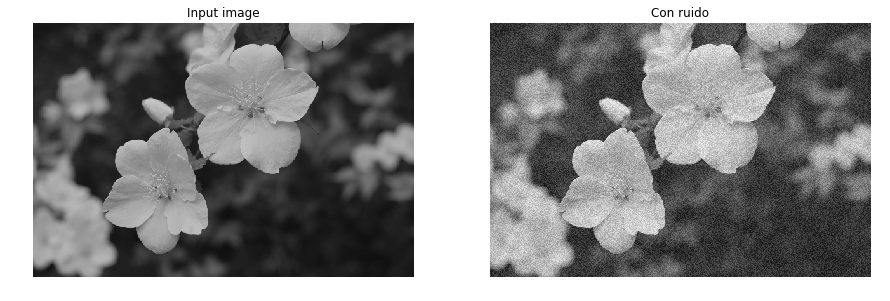

In [3]:
# read an image 
img = cv2.imread('figures/flower.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# initialize noise image with zeros
noise = np.zeros(gray.shape)
# fill the image with random numbers in given range
cv2.randu(noise, 0, 255)
noisy_gray = gray + np.array(0.2*noise, dtype=np.int)

# clip pixel values
noisy_gray[noisy_gray > 255] = 255 
noisy_gray[noisy_gray < 0] = 0

# Do plot
plot_cv_utils.subplot_cv_list([gray, noisy_gray],
                    ['Input image', 'Con ruido'], False, True)

## Reducción de ruido

https://docs.opencv.org/master/d5/d69/tutorial_py_non_local_means.html

## Filtros lineales

### Operador de punto
$g(i,j)=K\times f(i,j)+L$

$0\leq K\leq1$ luminosidad y
$0\leq L\leq255$ contraste

In [4]:
def point_operation(img, K, L):
    """
    Applies point operation to given grayscale image
    """
    img = np.asarray(img, dtype=np.float)
    img = img*K + L
    # clip pixel values
    img[img > 255] = 255 
    img[img < 0] = 0
    return np.asarray(img, dtype = np.uint8)

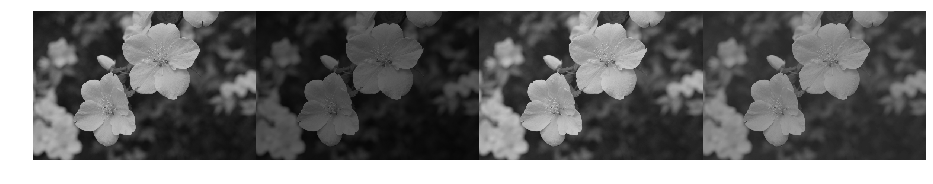

In [5]:
# k = 0.5, l = 0
out1 = point_operation(gray, 0.5, 0)

# k = 1., l = 10
out2 = point_operation(gray, 1., 10)

# k = 0.7, l = 25
out3 = point_operation(gray, 0.7, 25)

res = np.hstack([gray,out1, out2, out3])
plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

### Actividad

1. Cargar la imagen figures/flower.png
2. Convertirla a niveles de gris
3. Hacer que los valores de sus píxeles estén entre 100 y 150
4. Añadir 25% de ruido
5. Rotar 90 grados en sentido agujas del reloj
6. Escalar el ancho un 75% y el alto un 60%
7. Mostrar el original y el resultado.

¿Cómo sería hacerlo con la imagen en color?

## Filtros convolucionales 2D
El kernel es una matriz que se aplica a cada pixel de la imagen. El píxel que ocupa en cada momento la posición central del kernel se sustituye por la suma de los productos de cada elemento de la matriz por su píxel vecino correspondiente.

In [6]:
import matplotlib.image as mgimg

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
ax.axis('off')
fig.frameon = False

# initiate an empty  list of images 
myimages = []

#loops through available png:s
for p in range(0, 9):

    ## Read in picture
    fname = "figures/conv/convolution_schematicintuitive-explanation-convnets-%01d.png" %p 
    img_conv = mgimg.imread(fname)    
    imgplot = ax.imshow(img_conv)
    ax.set_visible = False

    # append AxesImage object to the list
    myimages.append([imgplot])

## create an instance of animation
my_anim = animation.ArtistAnimation(fig, myimages, interval=1000, blit=True, repeat = False)
#Para no mostrar debajo la última imagen
plt.close()

# o HTML(my_anim.to_jshtml())
HTML(my_anim.to_html5_video())

### Difuminado (blur)

En general $K=\dfrac{1}{n^{2}}\mathsf{ones}(n,n)$

P. ej. en 3x3 $K=\dfrac{1}{9}\left(\begin{array}{ccc}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{array}\right)$

Otros filtros que usan matrices distintas en https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html


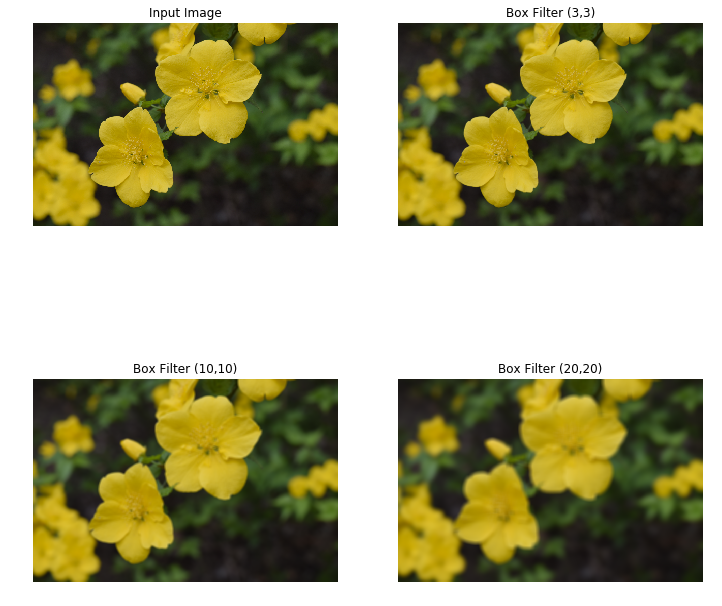

In [7]:
kernel_size = (3,3)
blur3 = cv2.blur(img,kernel_size)

kernel_size = (10,10)
blur10 = cv2.blur(img,kernel_size)

kernel_size = (20,20)
blur20 = cv2.blur(img,kernel_size)

plot_cv_utils.subplot_4x4(img, blur3, blur10, blur20, 'Input Image', 'Box Filter (3,3)',
            'Box Filter (10,10)', 'Box Filter (20,20)')

### Detección de bordes
#### Sobel
Derivada primera,   $Sx=\left(\begin{array}{ccc}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{array}\right)$
$Sy=\left(\begin{array}{ccc}
-1 & -2 & 1\\
0 & 0 & 0\\
1 & 2 & 1
\end{array}\right)$

#### Laplacian
Derivada segunda, $L=\left(\begin{array}{ccc}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{array}\right)$
#### Canny
Para bordes en figuras complejas, menos ruido que Laplace, y color
https://docs.opencv.org/master/da/d22/tutorial_py_canny.html

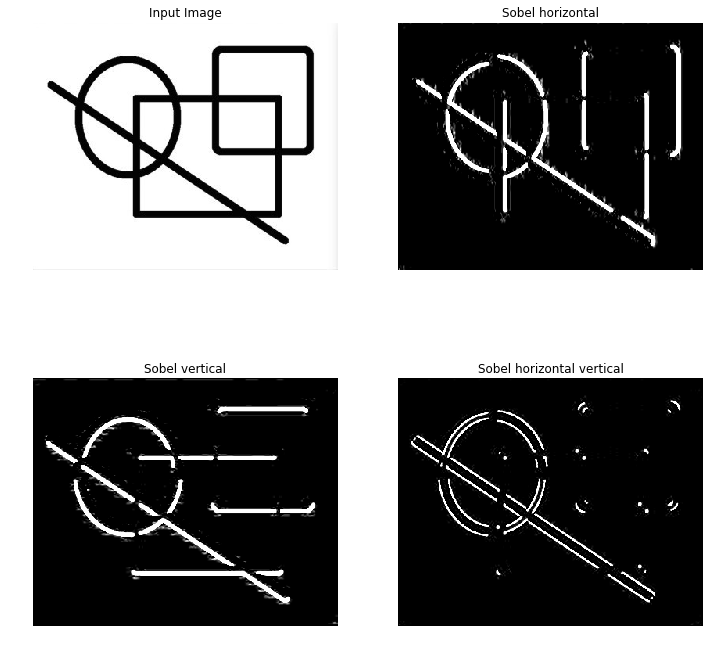

In [8]:
bordes = cv2.imread('figures/bordes.jpeg', 0)
sobel_horz = cv2.Sobel(bordes, cv2.CV_64F, 1, 0, ksize=5)
sobel_vert = cv2.Sobel(bordes, cv2.CV_64F, 0, 1, ksize=5)
sobel_horz_vert = cv2.Sobel(bordes, cv2.CV_64F, 1, 1, ksize=5)
plot_cv_utils.subplot_4x4(bordes, sobel_horz, sobel_vert, sobel_horz_vert,
                          'Input Image', 'Sobel horizontal',
            'Sobel vertical', 'Sobel horizontal vertical', True)


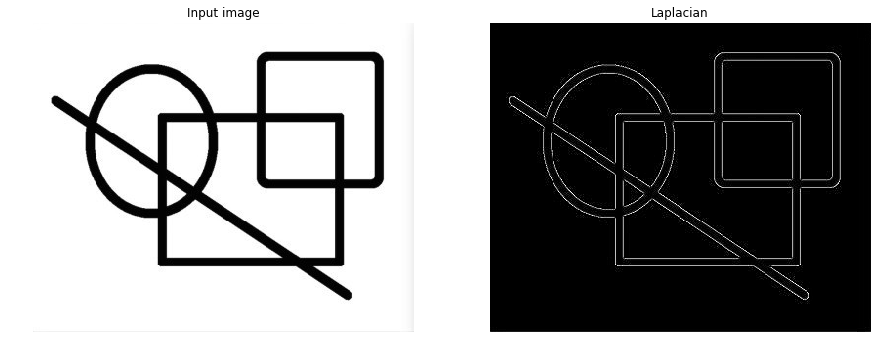

In [9]:
laplacian = cv2.Laplacian(bordes, cv2.CV_64F)
plot_cv_utils.subplot_cv_list([bordes, laplacian],
                              ['Input image', 'Laplacian'], False, True)

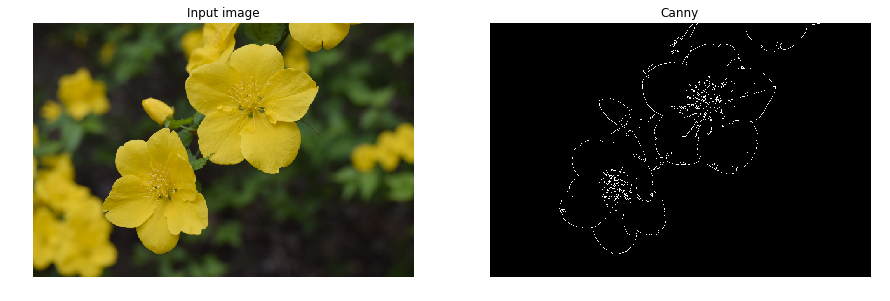

In [10]:
canny = cv2.Canny(img, 50, 240)
plot_cv_utils.subplot_cv_list([cv2.cvtColor(img, cv2.COLOR_BGR2RGB), canny], 
                              ['Input image', 'Canny'], False, True)

## Umbral (Threshold)

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

### Umbral simple

Un valor de umbral fijo para toda la imagen.

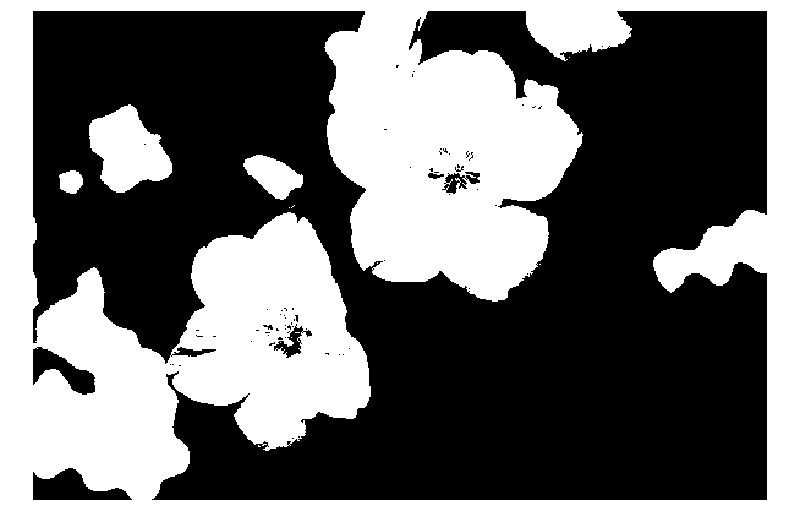

In [11]:
umbral = 127
threshold = cv2.threshold(gray, umbral, 255, cv2.THRESH_BINARY)
# con cv2.THRESH_BINARY_INV se invierte el b/n
# threshold[0] es el valor umbral
plot_cv_utils.plot_cv_img(threshold[1], True)

### Umbral adaptativo

En cada pixel el umbral es calculado a partir de los vecinos (media, media con ponderaciones Gaussianas, etc.)

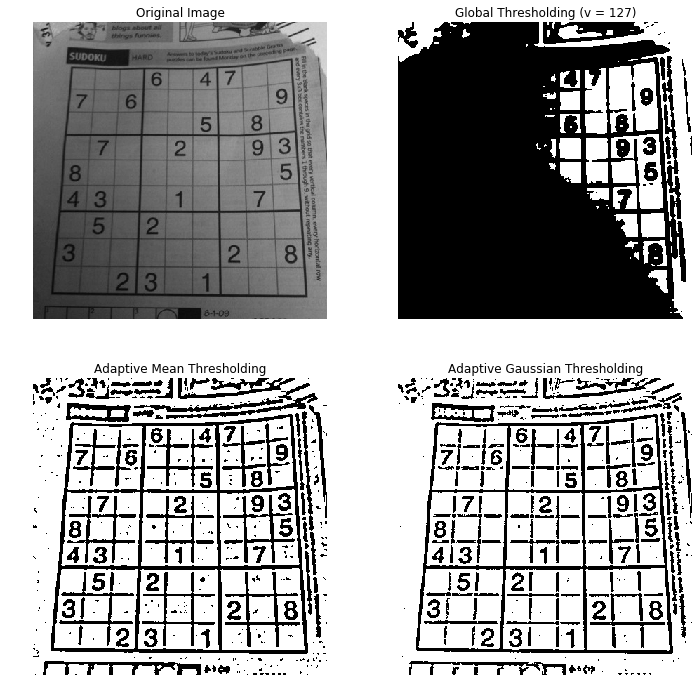

In [12]:
kernel_size = (5,5)
sudoku = cv2.imread('figures/sudoku.jpg',0)
# El difuminado hace más uniforme el fondo localmente
# elimina ruido tras el umbral
sudoku_blur = cv2.blur(sudoku,kernel_size)

ret,th1 = cv2.threshold(sudoku_blur,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(sudoku_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(sudoku_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plot_cv_utils.subplot_4x4(sudoku, th1, th2, th3, 'Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding', True)

### Umbral Otsu

Para imágenes bimodales, ver enlace anterior.

## Operaciones morfológicas
Se define una matriz con 0s y 1s, el kernel (elemento estructurante) son los 1s. Puede tener forma de rectángulo, círculo, aro, etc. Normalmente se usan en imágenes binarias, pero pueden ser usados en imágenes en niveles de gris.
### Erosión
El píxel central del núcleo, sea 0 o 1, se convertirá 1 solo si todos los demás píxeles bajo el núcleo son 1, si no, se convertirá en 0.
### Dilatación
El píxel central del núcleo, sea 0 o 1, se convertirá 0 solo si todos los demás píxeles bajo el núcleo son 0, si no, se convertirá en 1.
### Apertura
Erosión seguida de dilatación, elimina ruido.
### Cierre
Dilatación seguida de erosión, rellena agujeros.
### Gradiente morfológico
Dilatación menos erosión.

Para más tipos https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html

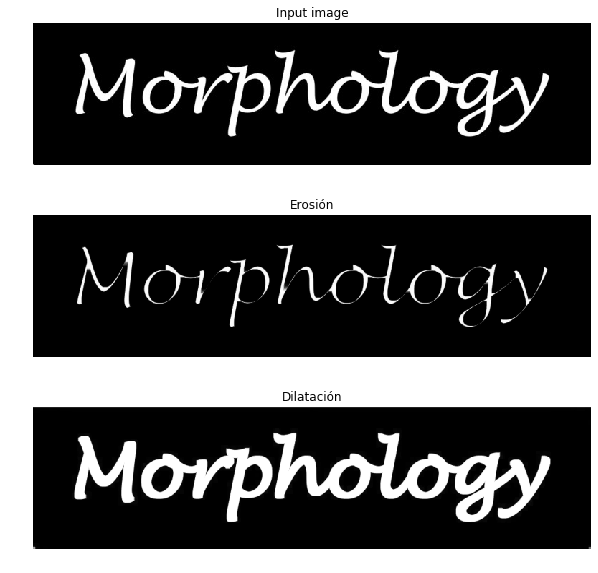

In [13]:
# erode y dilate
img_morfo = cv2.imread('figures/morfo.jpeg', 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
img_erosion = cv2.erode(img_morfo, kernel, iterations=1)
img_dilation = cv2.dilate(img_morfo, kernel, iterations=1)
plot_cv_utils.subplot_cv_list([img_morfo, img_erosion, img_dilation],
                              ['Input image', 'Erosión', 'Dilatación'],
                              True, True)

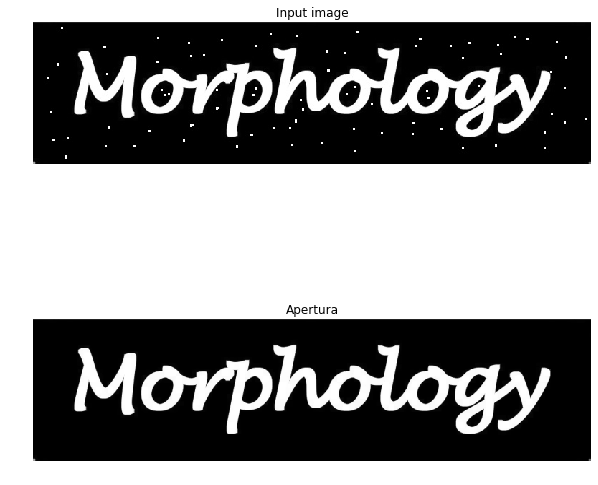

In [14]:
# opening
img_morfo = cv2.imread('figures/morfo_puntos.jpeg', 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
img_opening = cv2.morphologyEx(img_morfo, cv2.MORPH_OPEN, kernel)
plot_cv_utils.subplot_cv_list([img_morfo, img_opening],
                              ['Input image', 'Apertura'], True, True)

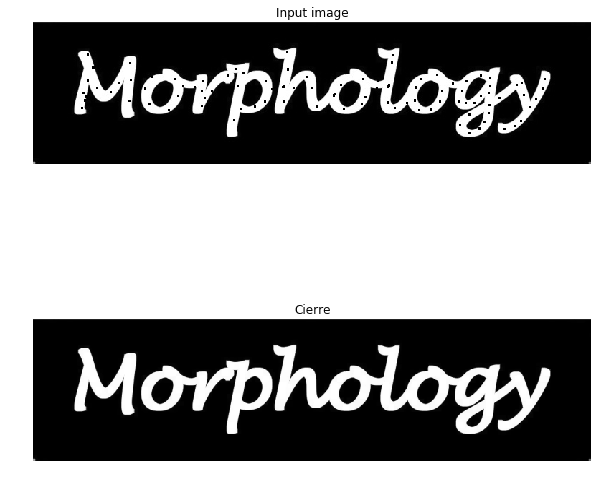

In [15]:
# closing
img_morfo = cv2.imread('figures/morfo_agujeros.jpeg', 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
img_closing = cv2.morphologyEx(img_morfo, cv2.MORPH_CLOSE, kernel)
plot_cv_utils.subplot_cv_list([img_morfo, img_opening],
                              ['Input image', 'Cierre'], True, True)

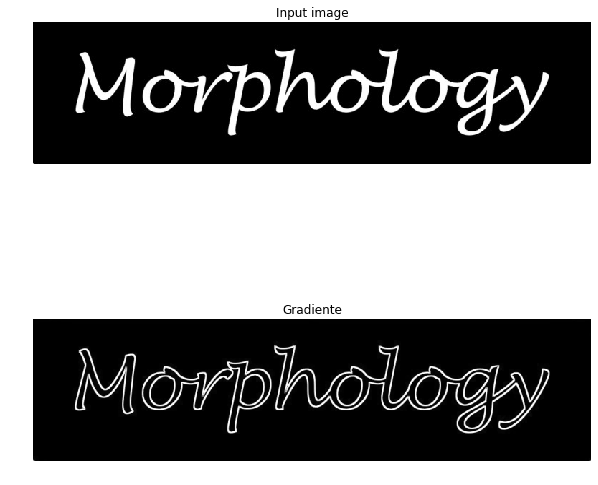

In [16]:
# morphological gradient
img_morfo = cv2.imread('figures/morfo.jpeg', 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
img_gradient = cv2.morphologyEx(img_morfo, cv2.MORPH_GRADIENT, kernel)
plot_cv_utils.subplot_cv_list([img_morfo, img_gradient], ['Input image', 'Gradiente'], True, True)

## Mejora de contraste
Se realiza mediante ecualización del histograma.

Ver más en https://docs.opencv.org/3.4.1/d5/daf/tutorial_py_histogram_equalization.html

### En niveles de grises

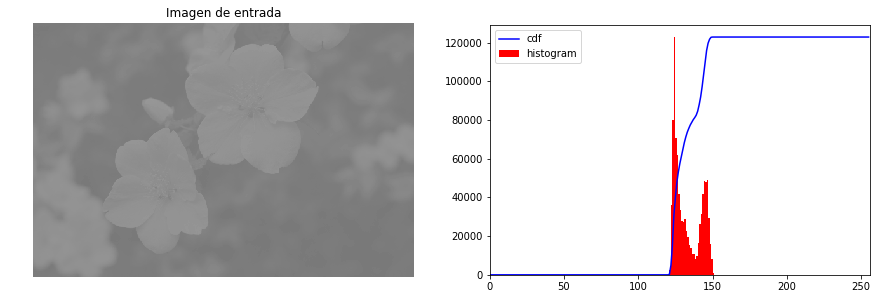

In [17]:
img_badcontrast_bn = cv2.imread('figures/flower_badcontrast_bn.png',0)
 
hist,bins = np.histogram(img_badcontrast_bn.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plot_cv_utils.plot_image_histo(img_badcontrast_bn, hist, cdf_normalized,
                               'Imagen de entrada')

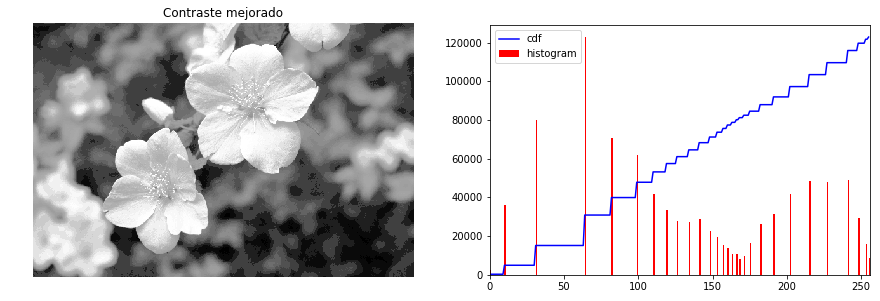

In [18]:
# esta es la función equalizeHist
img_badcontrast_bn_equ = cv2.equalizeHist(img_badcontrast_bn)

hist,bins = np.histogram(img_badcontrast_bn_equ.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plot_cv_utils.plot_image_histo(img_badcontrast_bn_equ, hist, cdf_normalized, 'Contraste mejorado')

### En color

In [19]:
img_badcontrast = cv2.imread('figures/acantilado_color.png')

img_yuv = cv2.cvtColor(img_badcontrast, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
plot_cv_utils.subplot_cv_list([img_badcontrast, img_output],
                              ['Imagen de entrada', 'Contraste mejorado'], 
                              False, False)

error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


### Más en los enlaces de la primera y otras celdas.